In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

np.random.seed(42)
 
%config InlineBackend.figure_format = 'retina'

In [2]:
#download all the database (NYPD, LAPD,SFPD, Baltimore PD)

#append different dates for NYPD
nypd_historical = pd.read_csv('NYPD_Historic.csv')
nypd_current = pd.read_csv('NYPD_current.csv')

nypd = nypd_historical.append(nypd_current, sort=False)
sfpd = pd.read_csv('SFPD.csv')
lapd = pd.read_csv('LAPD.csv')
balt_pd = pd.read_csv('balt.csv')


/Users/jennycho/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
nypd.columns

Index(['CMPLNT_NUM', 'CMPLNT_FR_DT', 'CMPLNT_FR_TM', 'CMPLNT_TO_DT',
       'CMPLNT_TO_TM', 'ADDR_PCT_CD', 'RPT_DT', 'KY_CD', 'OFNS_DESC', 'PD_CD',
       'PD_DESC', 'CRM_ATPT_CPTD_CD', 'LAW_CAT_CD', 'BORO_NM',
       'LOC_OF_OCCUR_DESC', 'PREM_TYP_DESC', 'JURIS_DESC', 'JURISDICTION_CODE',
       'PARKS_NM', 'HADEVELOPT', 'HOUSING_PSA', 'X_COORD_CD', 'Y_COORD_CD',
       'SUSP_AGE_GROUP', 'SUSP_RACE', 'SUSP_SEX', 'TRANSIT_DISTRICT',
       'Latitude', 'Longitude', 'Lat_Lon', 'PATROL_BORO', 'STATION_NAME',
       'VIC_AGE_GROUP', 'VIC_RACE', 'VIC_SEX'],
      dtype='object')

In [10]:
nypd.head()

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,ADDR_PCT_CD,RPT_DT,KY_CD,OFNS_DESC,PD_CD,...,SUSP_SEX,TRANSIT_DISTRICT,Latitude,Longitude,Lat_Lon,PATROL_BORO,STATION_NAME,VIC_AGE_GROUP,VIC_RACE,VIC_SEX
0,590402415,08/22/2007,16:00:00,08/22/2007,21:45:00,62.0,08/22/2007,578,HARRASSMENT 2,638.0,...,F,NaN,40.610586,-73.980682,"(40.610586209, -73.980682338)",PATROL BORO BKLYN SOUTH,NaN,45-64,WHITE,F
1,916707771,08/22/2007,16:00:00,08/22/2007,16:10:00,71.0,08/22/2007,344,ASSAULT 3 & RELATED OFFENSES,101.0,...,NaN,NaN,40.662229,-73.934430,"(40.66222879, -73.934429999)",PATROL BORO BKLYN SOUTH,NaN,18-24,BLACK,F
2,724044564,08/22/2007,16:00:00,NaN,NaN,72.0,08/22/2007,235,DANGEROUS DRUGS,511.0,...,NaN,NaN,40.644697,-74.003583,"(40.644697283, -74.003583285)",PATROL BORO BKLYN SOUTH,NaN,NaN,UNKNOWN,E
3,410394691,08/22/2007,16:00:00,08/22/2007,16:05:00,75.0,08/22/2007,109,GRAND LARCENY,419.0,...,M,NaN,40.664294,-73.886264,"(40.664293755, -73.886264319)",PATROL BORO BKLYN NORTH,NaN,<18,UNKNOWN,F
4,365718279,08/22/2007,16:00:00,NaN,NaN,107.0,08/22/2007,351,CRIMINAL MISCHIEF & RELATED OF,259.0,...,NaN,NaN,40.715144,-73.806594,"(40.715144183, -73.806593786)",PATROL BORO QUEENS SOUTH,NaN,45-64,ASIAN / PACIFIC ISLANDER,M


In [11]:
lapd.head()

,DR Number,Date Reported,Date Occurred,Time Occurred,Area ID,Area Name,Reporting District,Crime Code,Crime Code Description,MO Codes,...,Weapon Description,Status Code,Status Description,Crime Code 1,Crime Code 2,Crime Code 3,Crime Code 4,Address,Cross Street,Location
0,151521112,11/04/2015,11/03/2015,2230,NaN,N Hollywood,1555,330,BURGLARY FROM VEHICLE,0344,...,NaN,IC,Invest Cont,330.0,NaN,NaN,NaN,11100 CAMARILLO ST,NaN,"(34.1577, -118.3727)"
1,151521113,11/04/2015,10/30/2015,200,NaN,N Hollywood,1548,330,BURGLARY FROM VEHICLE,0344 1609 1307,...,NaN,IC,Invest Cont,330.0,NaN,NaN,NaN,11100 CHANDLER BL,NaN,"(34.1681, -118.3724)"
2,151521117,11/04/2015,11/04/2015,1400,NaN,N Hollywood,1506,930,CRIMINAL THREATS - NO WEAPON DISPLAYED,0421,...,VERBAL THREAT,JA,Juv Arrest,930.0,NaN,NaN,NaN,7300 BAKMAN AV,NaN,"(34.203, -118.3779)"
3,151521121,11/04/2015,04/28/2015,2125,NaN,N Hollywood,1567,121,"RAPE, FORCIBLE",2000 0429 1241 0416 0400 0527 1813 2002,...,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AO,Adult Other,121.0,NaN,NaN,NaN,10700 LANDALE ST,NaN,"(34.1513, -118.3642)"
4,151521123,11/05/2015,10/27/2015,600,NaN,N Hollywood,1515,354,THEFT OF IDENTITY,0100 1822,...,NaN,IC,Invest Cont,354.0,NaN,NaN,NaN,11700 LEMAY ST,NaN,"(34.1912, -118.3891)"


In [12]:
balt_pd.head()

,CrimeDate,CrimeTime,CrimeCode,Location,Description,Weapon,District,Neighborhood
0,03/30/2019,9:42:00 AM,6E,2600 CECIL AVE,LARCENY,NaN,NORTHEASTERN,Coldstream Homestead Mont
1,03/30/2019,9:30:00 PM,6D,600 N MARTIN LUTHER KING JR BLVD,LARCENY FROM AUTO,NaN,CENTRAL,Seton Hill
2,03/30/2019,9:00:00 PM,3B,RD & WILKENS AV,ROBBERY - STREET,NaN,SOUTHWESTERN,Oaklee
3,03/30/2019,9:00:00 PM,4E,400 E PRATT ST,COMMON ASSAULT,NaN,CENTRAL,Inner Harbor
4,03/30/2019,9:00:00 PM,4E,400 E PRATT ST,COMMON ASSAULT,NaN,CENTRAL,Inner Harbor


In [13]:
sfpd.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,150060275,NON-CRIMINAL,LOST PROPERTY,Monday,01/19/2015,14:00,MISSION,NONE,18TH ST / VALENCIA ST,-122.421582,37.761701,"(37.7617007179518, -122.42158168137)",15006027571000
1,150098210,ROBBERY,"ROBBERY, BODILY FORCE",Sunday,02/01/2015,15:45,TENDERLOIN,NONE,300 Block of LEAVENWORTH ST,-122.414406,37.784191,"(37.7841907151119, -122.414406029855)",15009821003074
2,150098210,ASSAULT,AGGRAVATED ASSAULT WITH BODILY FORCE,Sunday,02/01/2015,15:45,TENDERLOIN,NONE,300 Block of LEAVENWORTH ST,-122.414406,37.784191,"(37.7841907151119, -122.414406029855)",15009821004014
3,150098210,SECONDARY CODES,DOMESTIC VIOLENCE,Sunday,02/01/2015,15:45,TENDERLOIN,NONE,300 Block of LEAVENWORTH ST,-122.414406,37.784191,"(37.7841907151119, -122.414406029855)",15009821015200
4,150098226,VANDALISM,"MALICIOUS MISCHIEF, VANDALISM OF VEHICLES",Tuesday,01/27/2015,19:00,NORTHERN,NONE,LOMBARD ST / LAGUNA ST,-122.431119,37.800469,"(37.8004687042875, -122.431118543788)",15009822628160


In [3]:
ny = nypd.sample(10000)
sf = sfpd.sample(10000)
la = lapd.sample(10000)
bp = balt_pd.sample(10000)

In [38]:
nypd['month']=(nypd['RPT_DT'].str[:2])
sfpd.columns

nypd['year']=(nypd['RPT_DT'].str[-4:])
nypd['month']=(nypd['RPT_DT'].str[:2])

sfpd['year']=(sfpd['Date'].str[-4:])
sfpd['month']=(sfpd['Date'].str[:2])

lapd['year']=(lapd['Date Reported'].str[-4:])
lapd['month']=(lapd['Date Reported'].str[:2])

balt_pd['year']=(balt_pd['CrimeDate'].str[-4:])
balt_pd['month']=(balt_pd['CrimeDate'].str[:2])

In [39]:
sfpd = (sfpd[sfpd["year"] != '2018'])
lapd = (lapd[lapd["year"] != '2019'])
balt_pd = (balt_pd[balt_pd["year"] != '2019'])

In [19]:
bpd = balt_pd.groupby(['year']).size()
sf = sfpd.groupby(['year']).size()
la = lapd.groupby(['year']).size()

In [20]:
bpd

year
2014    44722
2015    48191
2016    48754
2017    52141
2018    48092
dtype: int64

In [21]:
df_balt = pd.DataFrame(data=bpd)

In [22]:
b_pop = {'baltimore population' : []}

In [23]:
b_pop = {'baltimore population' : [0.6241, 0.623, 0.617, 0.6116, 0.6025]}
b_p = pd.DataFrame(data=b_pop)

In [24]:
b_p

,baltimore population
0,0.6241
1,0.6230
2,0.6170
3,0.6116
4,0.6025


In [25]:
balt_population = pd.merge(left) 

NameError: name 'left' is not defined

Text(0.5, 0, 'Year')

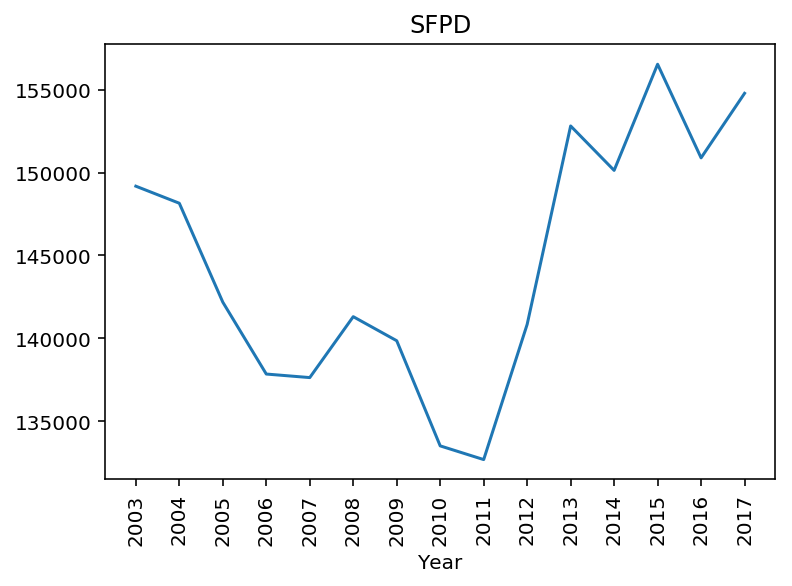

In [40]:
plt.plot(sfpd.groupby(['year']).size())
plt.title('SFPD')
plt.xticks(rotation='vertical')
plt.xlabel('Year')

Text(0.5, 0, 'Year')

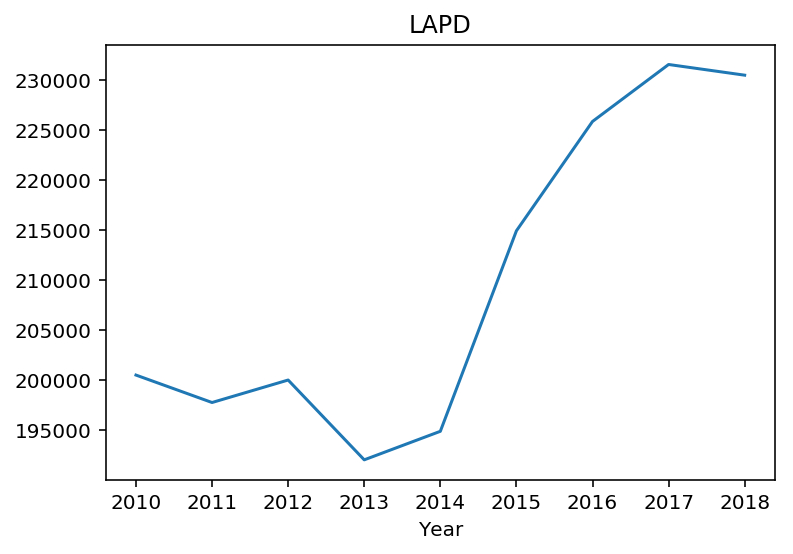

In [41]:
plt.plot(lapd.groupby(['year']).size())
plt.title('LAPD')
plt.xlabel('Year')

Text(0.5, 1.0, 'NYPD')

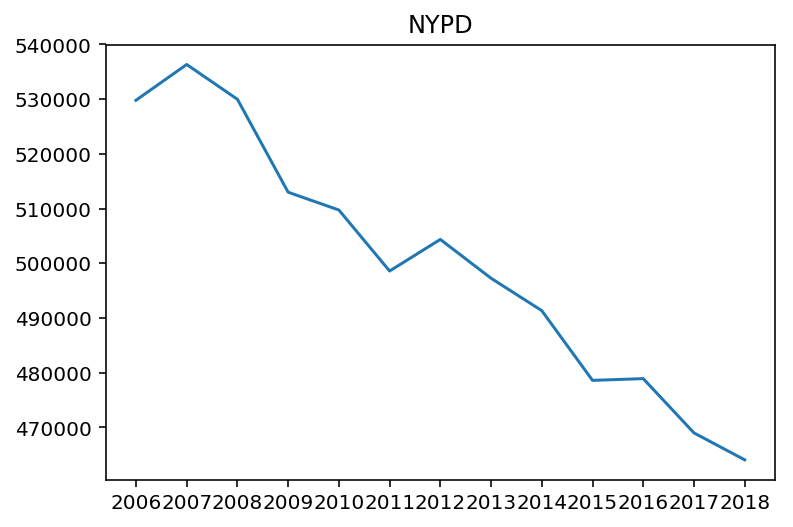

In [43]:
plt.plot(nypd.groupby(['year']).size())
plt.title('NYPD')

Text(0.5, 1.0, 'Baltimore PD')

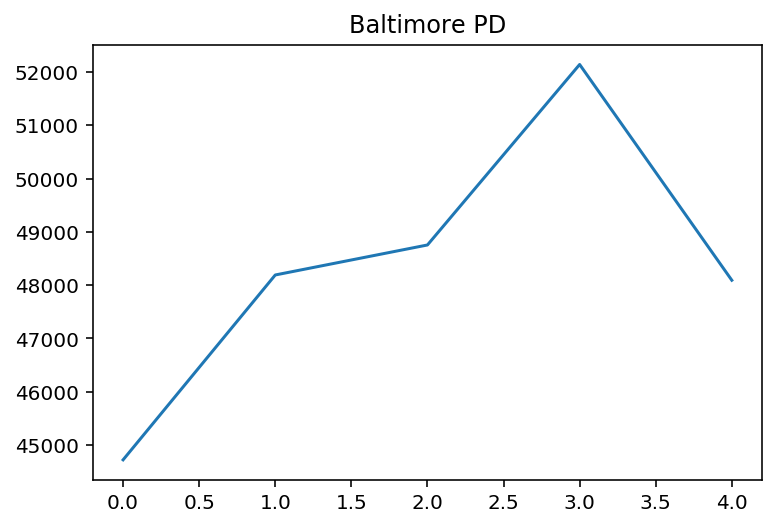

In [44]:
plt.plot(balt_pd.groupby(['year']).size().values)
plt.title('Baltimore PD')

Text(0.5, 1.0, 'SFPD')

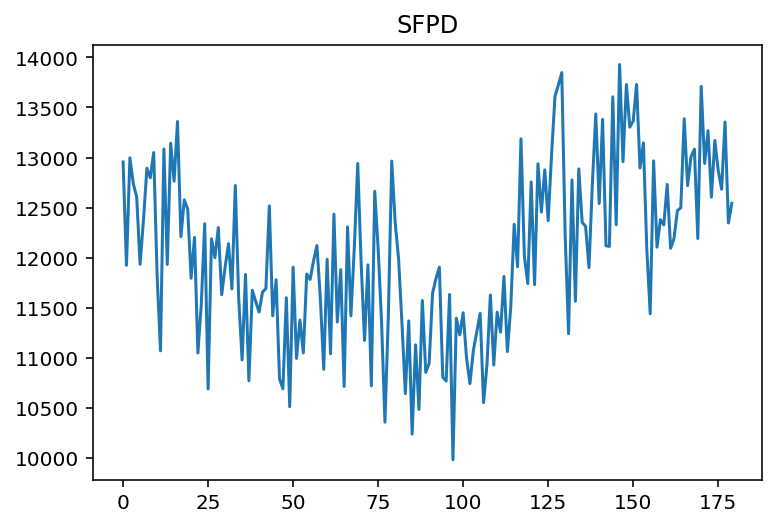

In [45]:
plt.plot(sfpd.groupby(['year','month']).size().values)
plt.title('SFPD')

Text(0.5, 1.0, 'LAPD')

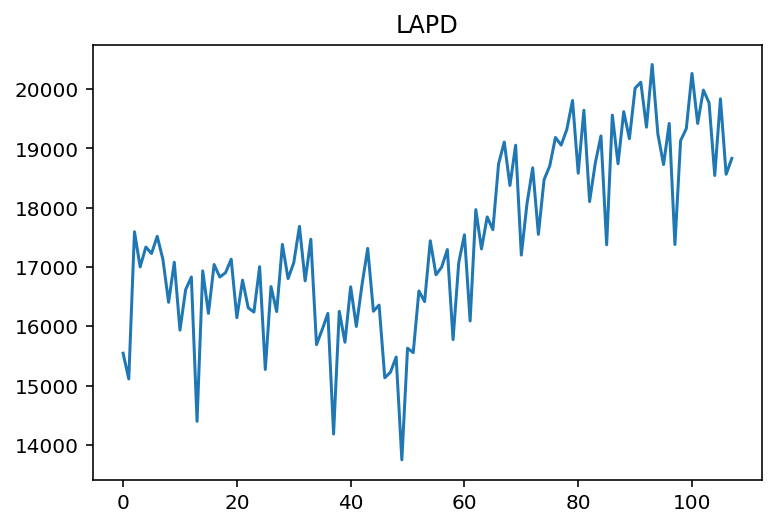

In [46]:
plt.plot(lapd.groupby(['year','month']).size().values)
plt.title('LAPD')

Text(0.5, 1.0, 'NYPD')

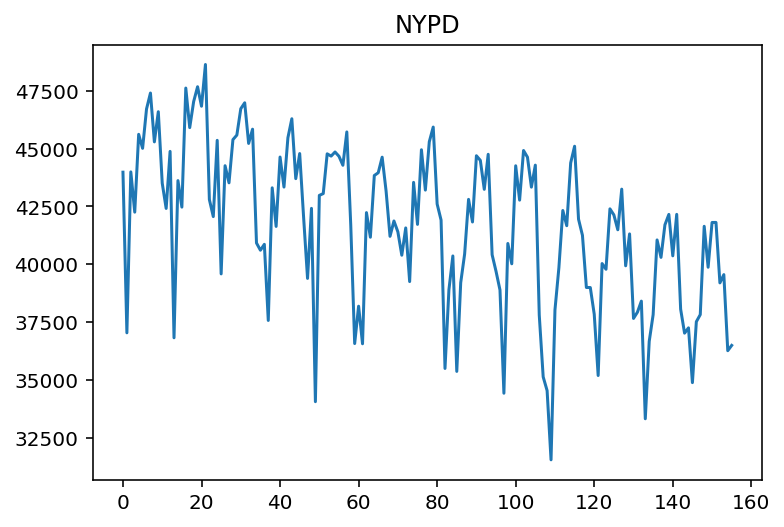

In [47]:
plt.plot(nypd.groupby(['year','month']).size().values)
plt.title('NYPD')

Text(0.5, 1.0, 'Baltimore PD')

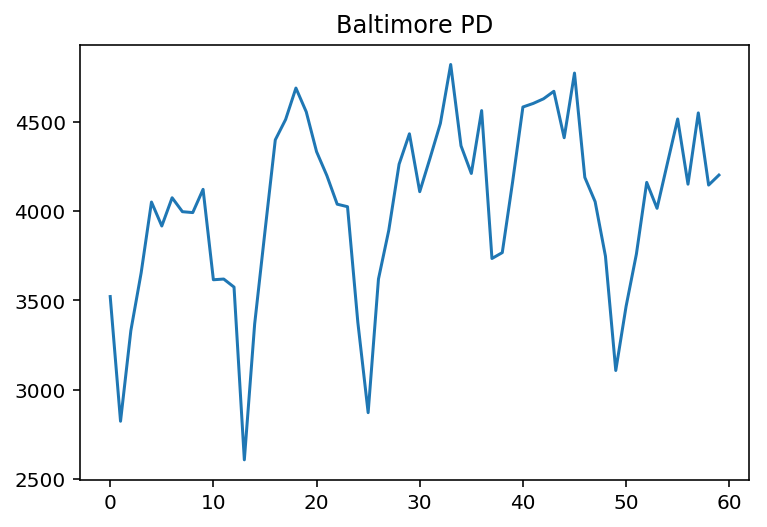

In [48]:
plt.plot(balt_pd.groupby(['year','month']).size().values)
plt.title('Baltimore PD')

Text(0.5, 1.0, 'SFPD')

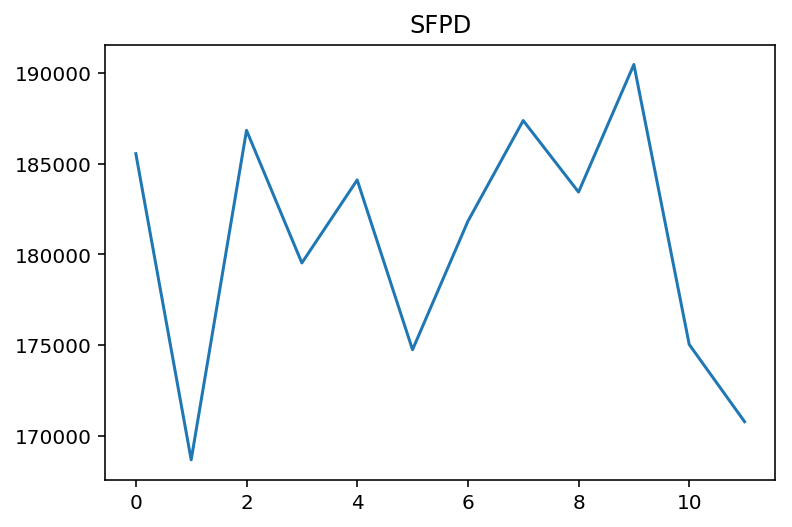

In [49]:
plt.plot(sfpd.groupby(['month']).size().values)
plt.title('SFPD')

Text(0.5, 1.0, 'LAPD')

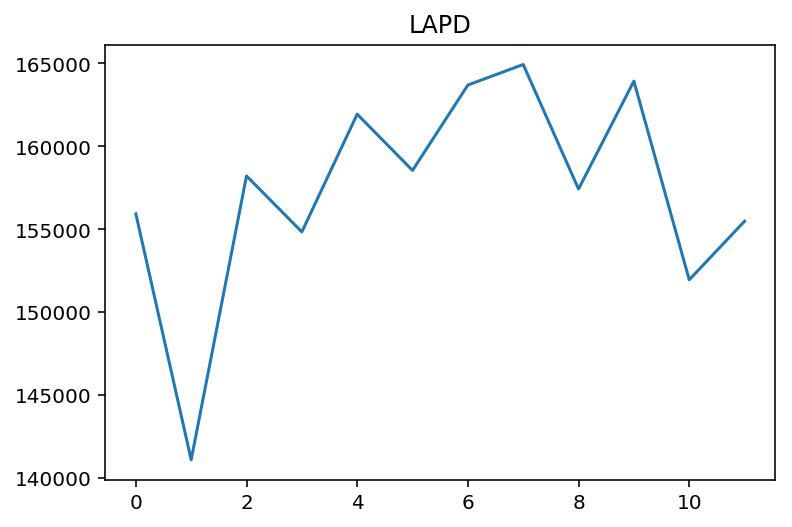

In [50]:
plt.plot(lapd.groupby(['month']).size().values)
plt.title('LAPD')

Text(0.5, 1.0, 'NYPD')

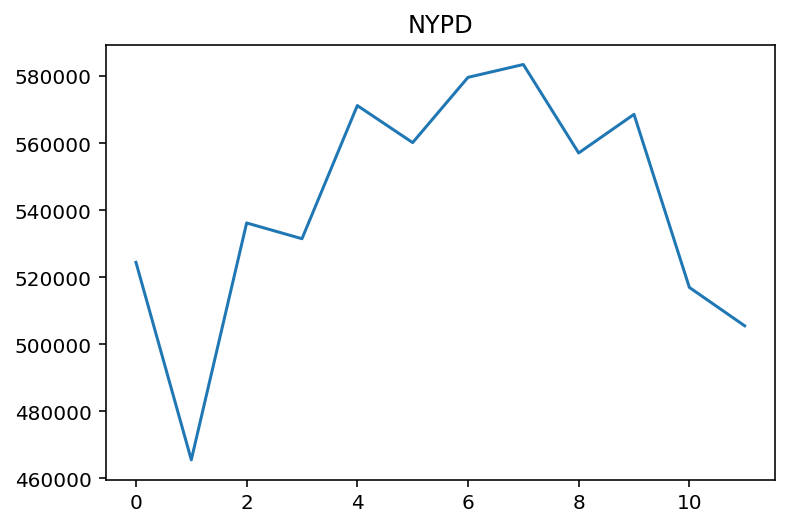

In [51]:
plt.plot(nypd.groupby(['month']).size().values)
plt.title('NYPD')

Text(0.5, 1.0, 'Baltimore PD')

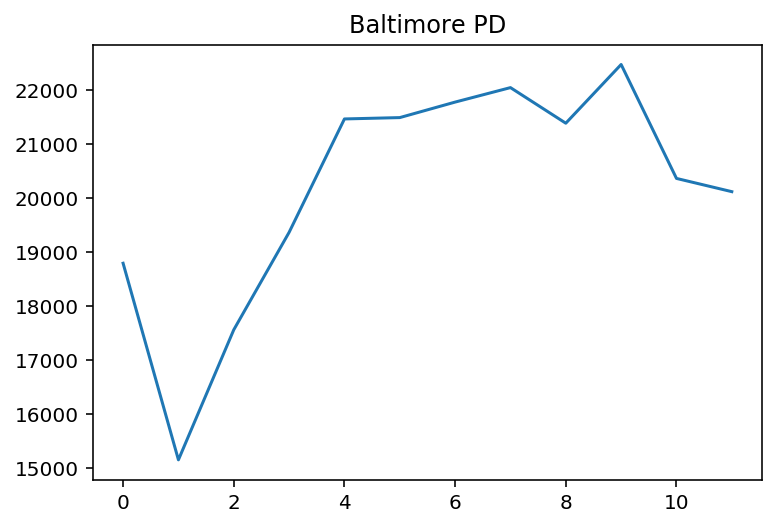

In [52]:
plt.plot(balt_pd.groupby(['month']).size().values)
plt.title('Baltimore PD')

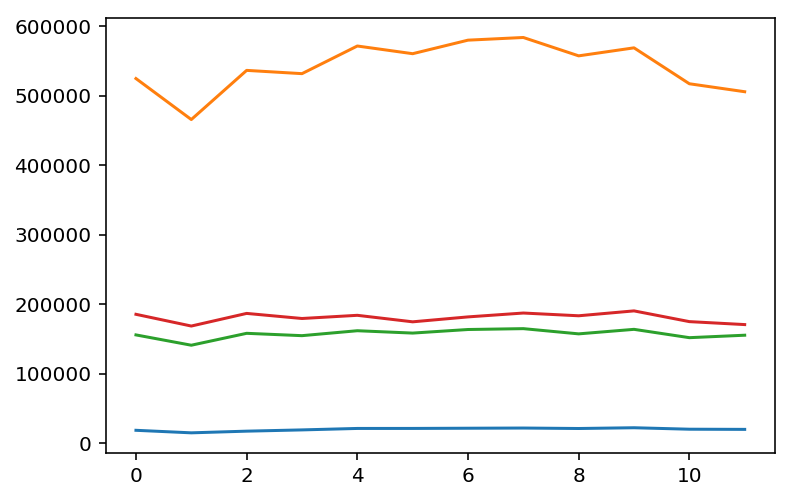

In [56]:
plt.plot(balt_pd.groupby(['month']).size().values)
plt.plot(nypd.groupby(['month']).size().values)
plt.plot(lapd.groupby(['month']).size().values)
plt.plot(sfpd.groupby(['month']).size().values)

Text(0.5, 0, 'Year')

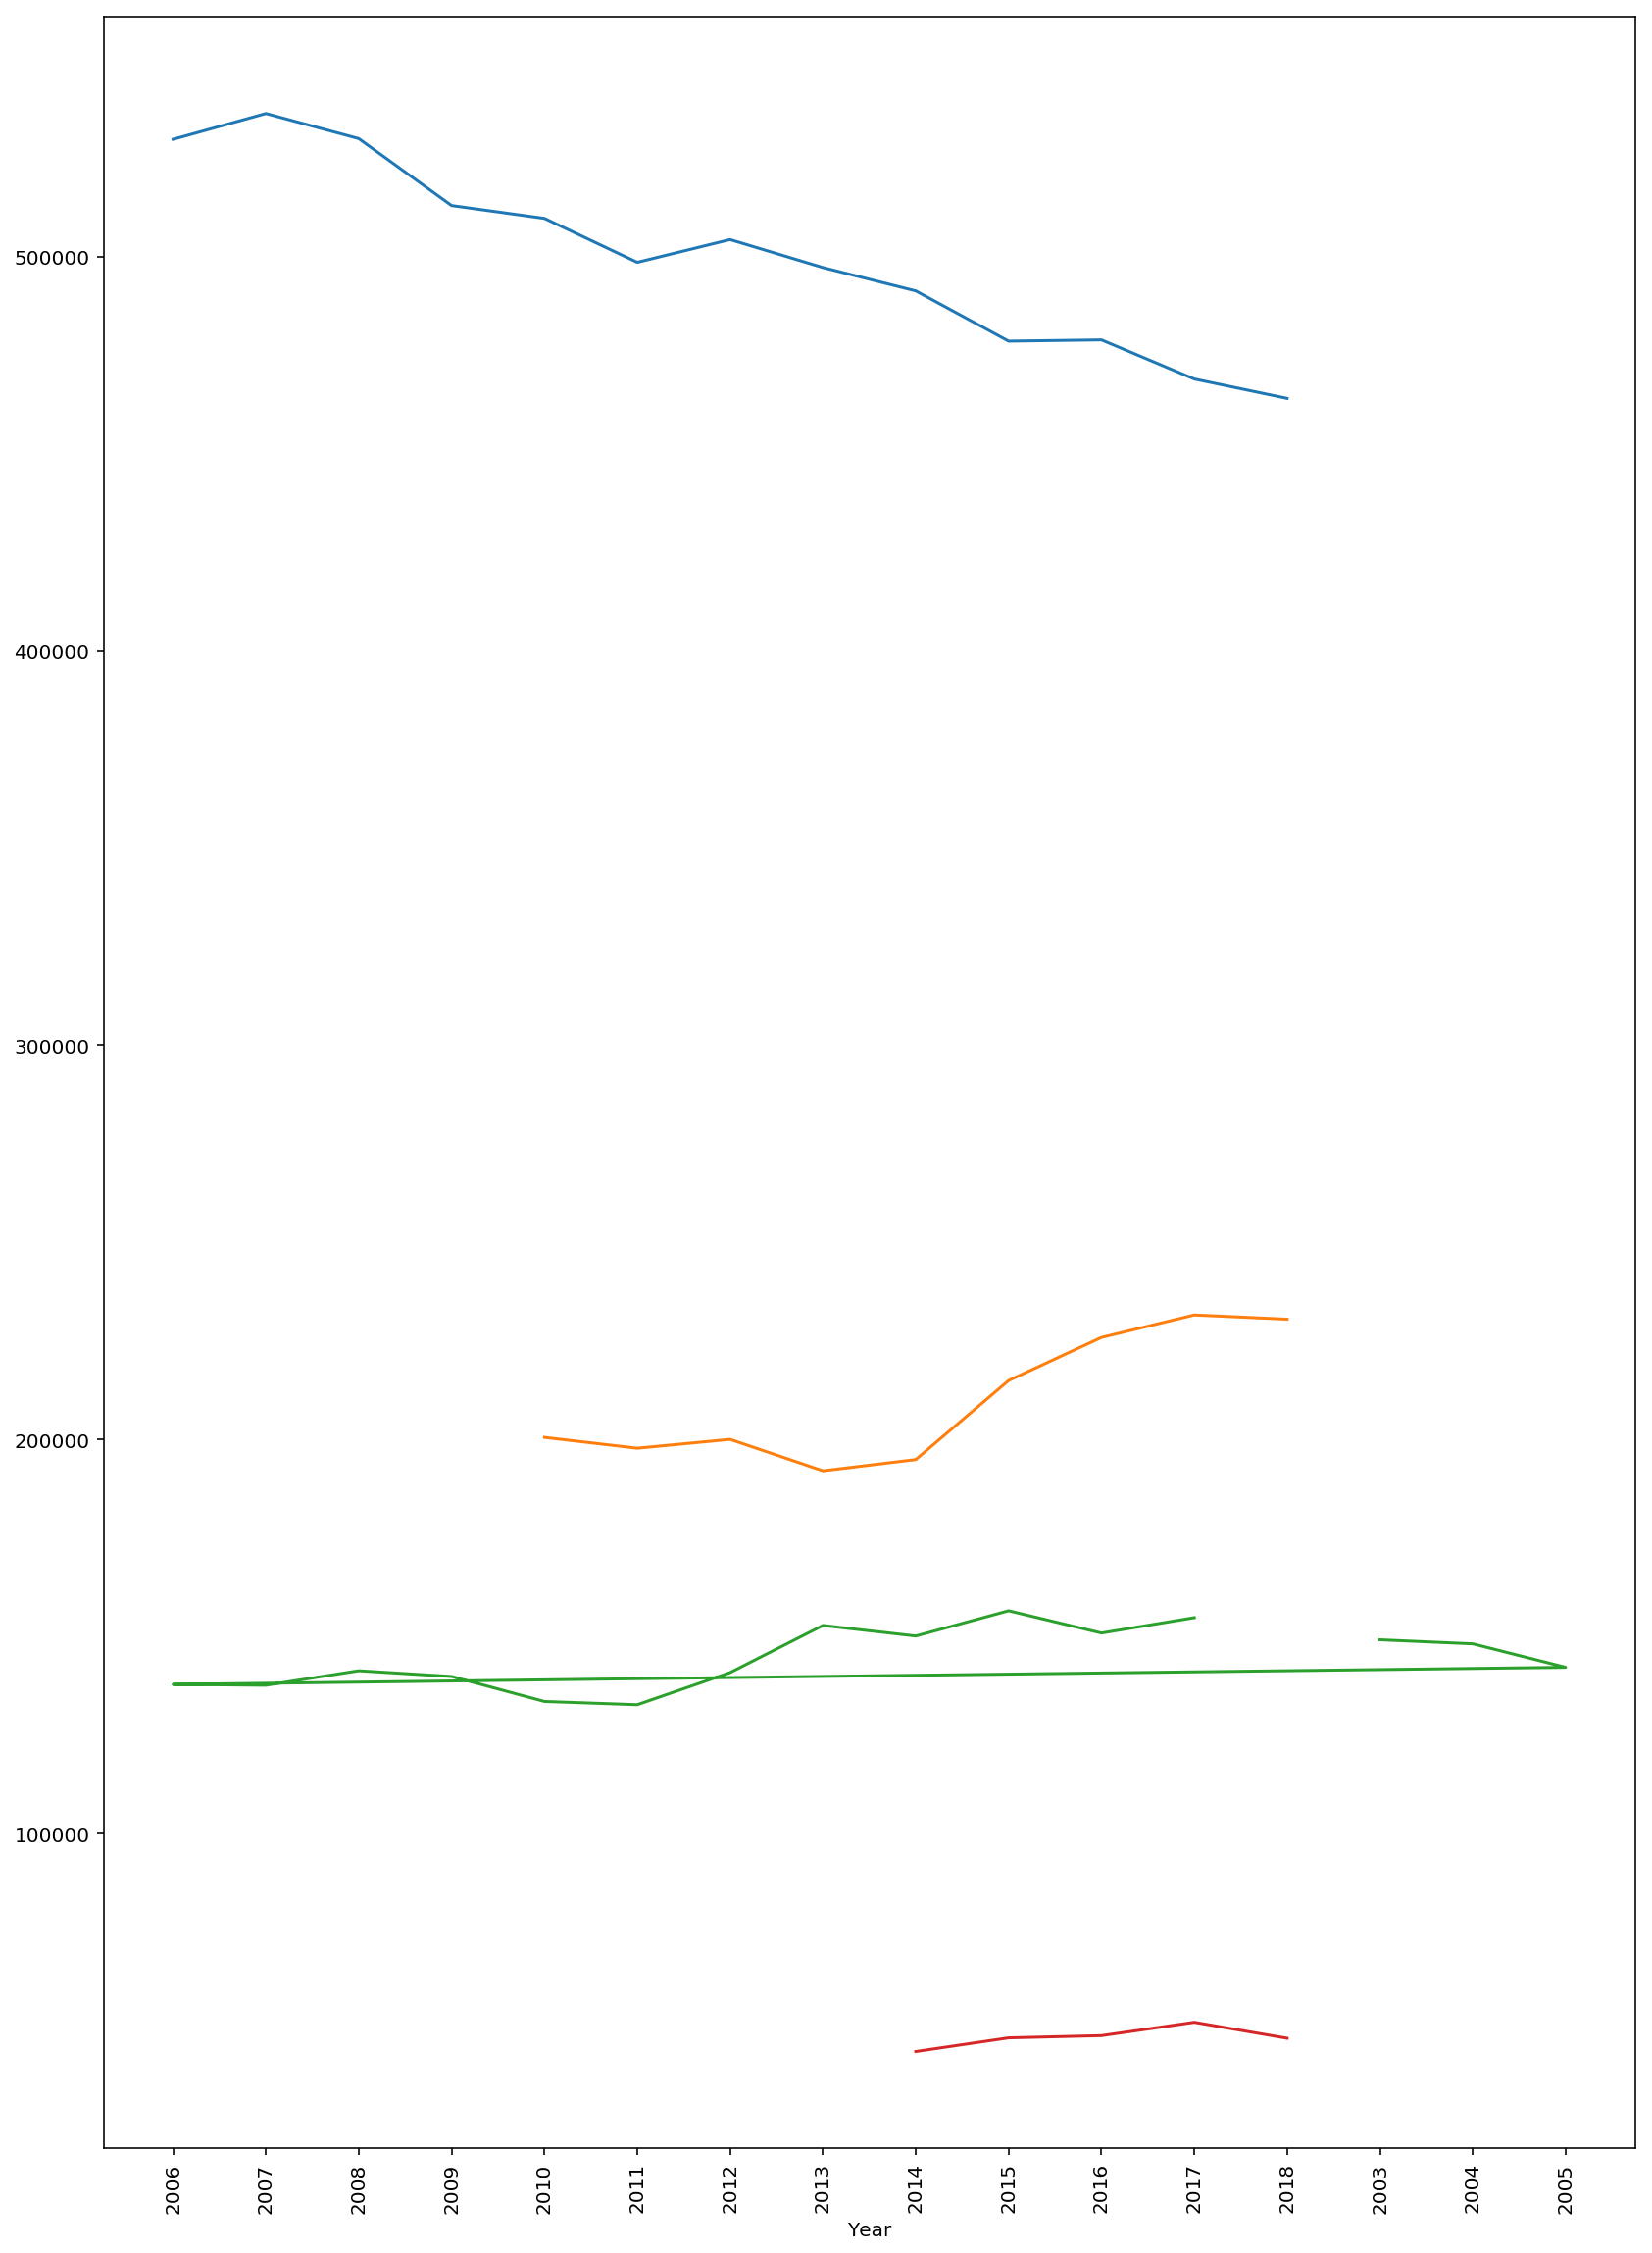

In [64]:
plt.figure(figsize = (14,20))
plt.plot(nypd.groupby(['year']).size(), label = 'NYPD')
plt.plot(lapd.groupby(['year']).size())
plt.plot(sfpd.groupby(['year']).size())
plt.plot(balt_pd.groupby(['year']).size())

plt.xticks(rotation='vertical')
plt.xlabel('Year')

In [ ]:
sfpd.head()
plt.figure(figsize = (7,10))
plt.scatter(sfpd.Y, sfpd.X, s=1)

In [ ]:
balt_pd.head()
plt.figure(figsize = (7,10))
plt.scatter(balt_pd.Longitude, balt_pd.Latitude, s=1, c=('b'))

In [ ]:
lapd.head()
plt.figure(figsize = (7,10))
plt.scatter(lapd.Location, s=1, )

In [ ]:
 plt.plot(nypd.groupby(['year','month']).size().values)
plt.title('NYPD')

In [ ]:
lapd.head()

plt.figure(figsize=(7,10))
plt.scatter(df.lon, df.lat, s=1, c=np.log(df.wait+1))
plt.title("JUMP bike parking spots")

In [ ]:
lapd.head()

plt.figure(figsize=(7,10))
plt.scatter(lapd.Location[1], lapd.Location[0], s=1 )
plt.title("JUMP bike parking spots")

In [ ]:

plt.figure(figsize=(7,10))
plt.scatter(nypd.Longitude, nypd.Latitude, s=1, c=np.log(nypd.PD_CD))
plt.title("NYPD")
plt.show

In [ ]:
sfpd.head()

In [ ]:
max(balt_pd['year'])

In [ ]:
sfpd = (sfpd[sfpd["year"] != '2018'])
lapd = (lapd[lapd["year"] != '2019'])
balt_pd = (balt_pd[balt_pd["year"] != '2019'])

In [ ]:
len(pd)

In [ ]:
len(sfpd['year'].values==2018)

In [ ]:
lapd.groupby('year').count().iloc[:,0]

In [ ]:
lapd.columns